# <div style='text-align: center;  font-weight:600;'  > Basic Multivariate Regression with Detailed EDA </div>

## <div style='text-align: center;'> Introduction </div>

### Context
* We are given a dataset containing information of the sale of more than 1000 used cars
* The dataset consists of 10 columns and 1435 rows.
* To predict the price of a used car, a model is required which factors in all the variables from the dataset.

### Index
1. [Collecting and Understanding the Dataset.](#collection)
2. [Cleaning and Visualising the Dataset.](#cleaning)
3. [EDA and Scaling](#eda)
4. [Machine Learning](#ml)


***

<a id='collection'></a>
## <div style='text-align: center;'>1. Collecting and Understanding the Dataset</div>

#### Importing relevant libraries and modules

* Importing Pandas for Data Handling.
* Importing Seaborn and Matplotlib for data Visualisation.

In [ ]:
# Data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#### Observing and Understanding the dataset

First the `CarSales.csv` file is stored in the dataframe for further working.

In [ ]:
df=pd.read_csv('CarSales.csv',index_col=0,na_values=['??',"????"])
df

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...
1431,7500,NaN,20544.0,Petrol,86.0,1.0,0,1300,3,1025
1432,10845,72.0,NaN,Petrol,86.0,0.0,0,1300,3,1015
1433,8500,NaN,17016.0,Petrol,86.0,0.0,0,1300,3,1015
1434,7250,70.0,NaN,NaN,86.0,1.0,0,1300,3,1015


All the unique values in the categorical features `Age, MetColor, Automatic and Doors` are extracted.

In [ ]:
print("Unique values of FuelType:",df['FuelType'].unique(),
    "\nUnique values of MetColor:",df['MetColor'].unique(),
    "\nUnique values of Automatic:",df['Automatic'].unique(),
    "\nUnique values of Doors:",df['Doors'].unique())

Unique values of FuelType: ['Diesel' 'Petrol' nan 'CNG'] 
Unique values of MetColor: [ 1. nan  0.] 
Unique values of Automatic: [0 1] 
Unique values of Doors: ['three' '3' '5' '4' 'four' 'five' '2']


##### Observations:

* Number of Features: `10`
* Target Feature: `Price` - Selling price of car ($)
* Numerical Features:
    * `Age` - Age of car in Years.
    * `KM` - Distance driven in Kms
    * `HP` - Power of Engine
    * `CC` - Volume of Engine
    * `Weight` - Weight in Kgs
* Categorical Features:
    * `MetColor` - Metallic Paint = 1,Non-Metallic Paint = 0
    * `Automatic` - Automatic = 1,Manual = 0
    * `FuelType` - Petrol, Diesel, CNG
* Ordinal Features:
    * `Doors` - No. of doors = 2,3,4,5 *(Multiple values are in form of words instead of numbers)*

In [ ]:
df.describe()

,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
count,1436.000000,1336.000000,1421.000000,1430.000000,1286.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.672156,68647.239972,101.478322,0.674961,0.055710,1566.827994,1072.45961
std,3626.964585,18.589804,37333.023589,14.768255,0.468572,0.229441,187.182436,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,0.000000,1300.000000,1000.00000
25%,8450.000000,43.000000,43210.000000,90.000000,0.000000,0.000000,1400.000000,1040.00000
50%,9900.000000,60.000000,63634.000000,110.000000,1.000000,0.000000,1600.000000,1070.00000
75%,11950.000000,70.000000,87000.000000,110.000000,1.000000,0.000000,1600.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,1.000000,2000.000000,1615.00000


In [ ]:
df.isnull().sum()

Price          0
Age          100
KM            15
FuelType      98
HP             6
MetColor     150
Automatic      0
CC             0
Doors          0
Weight         0
dtype: int64

##### Observations:
* `Age`, `FuelType` and `MetColor` have to be carefully imputated as they have a large number of null values.
* `KM` and `HP` can be imputated with more ease as they have a low number of null values.

***

<a id='cleaning'></a>
## <div style='text-align: center;'> 2. Cleaning and Visualising the Dataset </div>

### Feature Cleaning and Univariate Analysis

#### 1. Age

By visualising `Age` we can choose the method of imputation and whether to divide the feature.

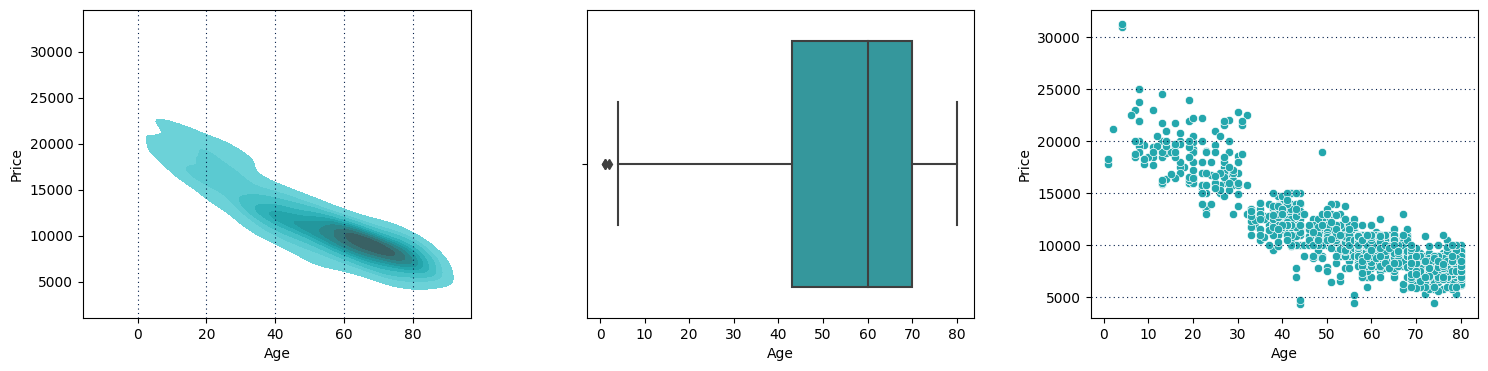

In [ ]:
pal=['#222831','#00ADB5','#FF8C32','#DDDDDD','#EEEEEE']

fig=plt.figure(figsize=(18,4))
gs=fig.add_gridspec(1,3)
gs.update(wspace=0.3)
ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])

ax0.grid(color='#001B48', linestyle=':', axis='x', zorder=0,  dashes=(1,3))
ax1.grid(color='#001B48', linestyle=':', axis='y', zorder=0, dashes=(1,3))
ax2.grid(color='#001B48', linestyle=':', axis='y', zorder=0, dashes=(1,3))

ax0=sns.kdeplot(ax=ax0,data=df,x='Age',y='Price',fill=True,color='#24a7ad')
ax1=sns.boxplot(ax=ax1,data=df,x='Age',color='#24a7ad')
ax2=sns.scatterplot(ax=ax2,data=df,x='Age',y='Price',color='#24a7ad')


##### Observations:
* Through Boxplot we understand that more than 50% of cars had their `Age` between 42 and 69.
* The DensityPlot and ScatterPlot show that although a large number of cars had their `Age` below 60 an unspecified age may very well be closest to 60.
* Therefore it's reasonable to replace the missing values of `Age` with Median instead of Mean.

In [ ]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,23.0,46986.0,Diesel,90.0,1.0,0,2000,three,1165
1,13750,23.0,72937.0,Diesel,90.0,1.0,0,2000,3,1165
2,13950,24.0,41711.0,Diesel,90.0,NaN,0,2000,3,1165
3,14950,26.0,48000.0,Diesel,90.0,0.0,0,2000,3,1165
4,13750,30.0,38500.0,Diesel,90.0,0.0,0,2000,3,1170


##### Observation:
* The ScatterPlot shows that Price decreases with `Age` hence Age-Bands can be created so that cars with a similar age can be grouped in a single band.
* It's feasible to create bands based on the assumption that small changes in `Age` don't have a reasonable effect on Price.
* Also we don't observe sudden jumps or falls in `Price` with respect to `Age` in the HistPlot thus supporting the decision of creating AgeBands.

In [ ]:
df['AgeBand']=pd.cut(df['Age'],bins=5)
uniques=df['AgeBand'].unique()
print("AgeBands created:")
for i in uniques:
    print(i)


AgeBands created:
(16.8, 32.6]
(48.4, 64.2]
(0.921, 16.8]
(32.6, 48.4]
(64.2, 80.0]


Now we can replace each element of `Age` by a weight according to it's respective AgeBand.

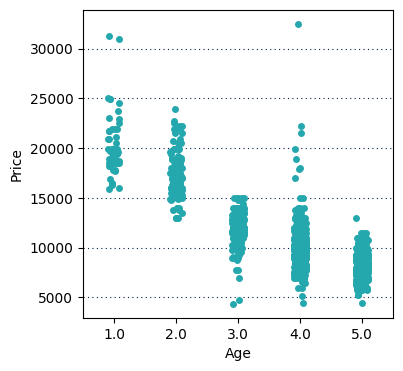

In [ ]:
df.loc[df['Age'] <= 16.8,'Age'] = 1
df.loc[(df['Age'] > 16.8) & (df['Age'] <= 32.6),'Age'] = 2
df.loc[(df['Age'] > 32.6) & (df['Age'] <= 48.4),'Age'] = 3
df.loc[(df['Age'] > 48.4) & (df['Age'] <= 64.2),'Age'] = 4
df.loc[(df['Age'] > 64.2) & (df['Age'] <= 80.0),'Age'] = 5
df=df.drop(['AgeBand'],axis=1)

fig=plt.figure(figsize=(4,4))
gs=fig.add_gridspec(1,1)
ax0=fig.add_subplot(gs[0,0])

ax0.grid(color='#001B48', linestyle=':', axis='y', zorder=0,  dashes=(1,3))
ax0=sns.stripplot(ax=ax0,data=df,x='Age',y='Price',color='#24a7ad')

#### 2. KMs

Through this step we can choose how to imputate and whether to divide or drop the `KM` feature.

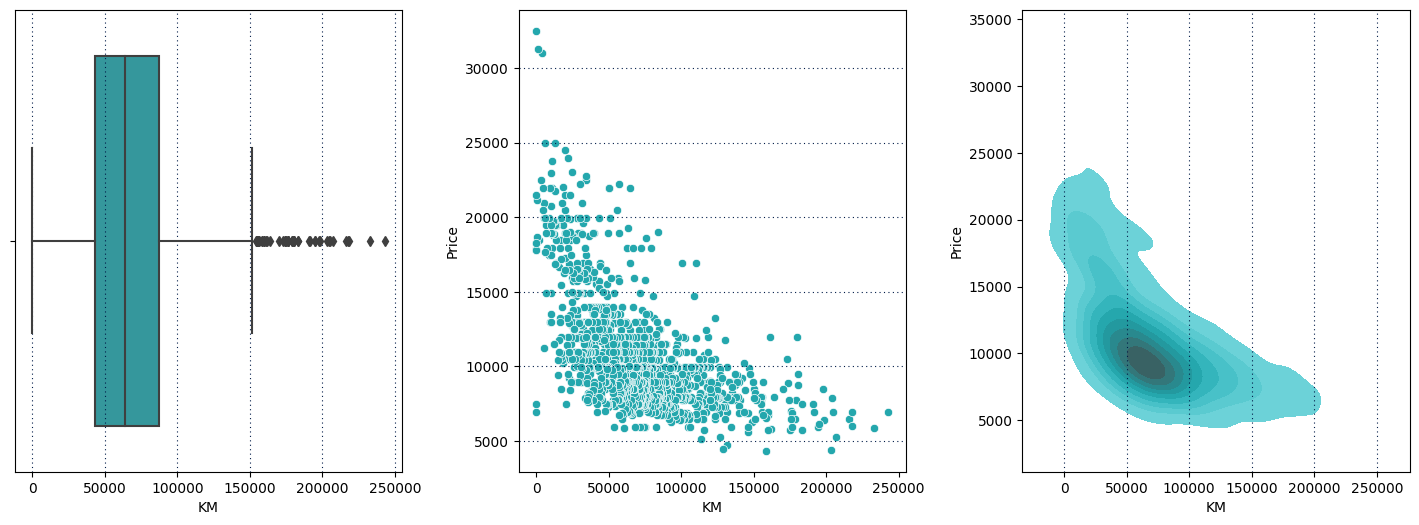

In [ ]:
fig=plt.figure(figsize=(18,6))
gs = fig.add_gridspec(1,3)
gs.update(wspace=0.3,hspace=0.15)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])
ax2=fig.add_subplot(gs[0,2])

ax0.grid(color='#001B48', linestyle=':', axis='x', zorder=0, dashes=(1,3))
ax1.grid(color='#001B48', linestyle=':', axis='y', zorder=0, dashes=(1,3))
ax2.grid(color='#001B48', linestyle=':', axis='x', zorder=0, dashes=(1,3))

ax0=sns.boxplot (ax=ax0, data=df, x='KM', color='#24a7ad')
ax1=sns.scatterplot(ax=ax1, data=df, x='KM',y='Price', color='#24a7ad')
ax2=sns.kdeplot(ax=ax2, data=df, x='KM',y='Price',fill=True, color='#24a7ad')

##### Observations:
* The ScatterPlot and Density-Plot shows the majority of distribution of `KM` is around the Mean.
* The BoxPlot shows that mean and median are very close to each other.
* Thus it is established that both, the mean as well as the median can effectively represent the missing values.
* Therefore, replacing the null values in `KM` by it's Mean is as effective as replacing them by it's Median.
* Here it's unnecessary to create bands of cars with similar distance driven as there are high differences in `Price` for cars with similar values of `KM`.

In [ ]:
df['KM'].fillna(df['KM'].mean(),inplace=True)

#### 3. FuelType

As FuelType has a lot of null values the primary objective is to identify the method of imputation.

<ipython-input-116-9344301c21f2>:12: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax1=sns.stripplot(ax=ax1,data=df,x='Price',y='FuelType',palette=pal)
<ipython-input-116-9344301c21f2>:12: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  ax1=sns.stripplot(ax=ax1,data=df,x='Price',y='FuelType',palette=pal)


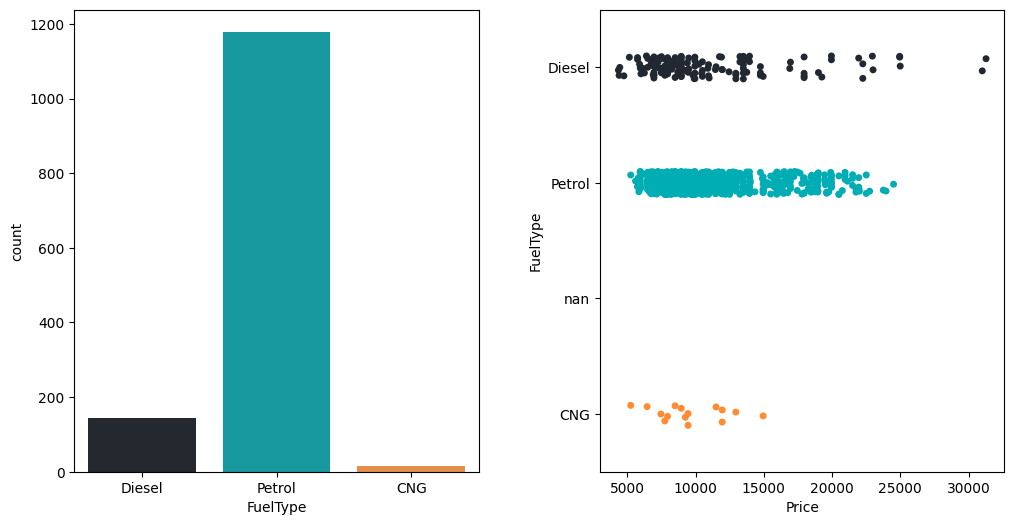

In [ ]:
fig=plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3,hspace=0.15)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

ax0.grid(color='#001B48', linestyle=':', axis='x', zorder=0,  dashes=(1,3))
ax1.grid(color='#001B48', linestyle=':', axis='y', zorder=0, dashes=(1,3))

ax0=sns.countplot(ax=ax0,data=df,x='FuelType',palette=pal)
ax1=sns.stripplot(ax=ax1,data=df,x='Price',y='FuelType',palette=pal)

##### Observation:
* Being a categorical dataset, it can be seen than any null value is most likely to be the mode of the distribution.
* Hence the null values are filled by the mode i.e `Petrol`.

In [ ]:
df['FuelType'].fillna(df['FuelType'].mode()[0],inplace=True)

#### 4. HP

Now we look at the distribution of HP to further understand how to fill the null values and whether to divide the data or not.

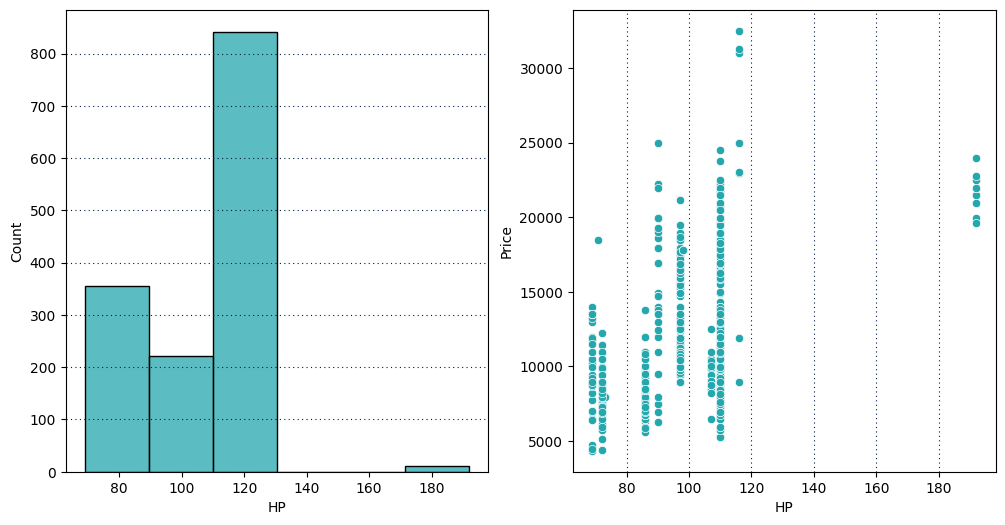

In [ ]:
fig=plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.2,hspace=0.15)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

ax0.grid(color='#001B48', linestyle=':', axis='y', zorder=0, dashes=(1,3))
ax1.grid(color='#001B48', linestyle=':', axis='x', zorder=0, dashes=(1,3))

ax0=sns.histplot(ax=ax0,data=df['HP'], bins=6, color='#24a7ad')
ax1=sns.scatterplot(ax=ax1,data=df,x='HP',y='Price', color='#24a7ad')

##### Observation:
* It is observed that the mean of HP would not properly represent the missing values as:
    * It is distributed very evenly in a large area between 40 and 110.
    * This may result in the null values being misrepresented as a less-likely value.
* Therefore the null values are filled with the median of the distribution to minimise the error.
* We can also create groups of cars with similar HP as multiple cars with similar power are more likely to have the same selling price.

In [ ]:
df['HP'].fillna(df['HP'].median(),inplace=True)
df['HPBand']=pd.cut(df['HP'],bins=6)
uniques=df['HPBand'].unique()
print("HP Bands:")
for i in uniques:
    print(i)

HP Bands:
(89.5, 110.0]
(171.5, 192.0]
(68.877, 89.5]
(110.0, 130.5]


* Now we create 4 different bands of HP using these boundary values.
* The final band will get a weight of 6 as it's the 6th band while band 4 and 5 contain no elements.

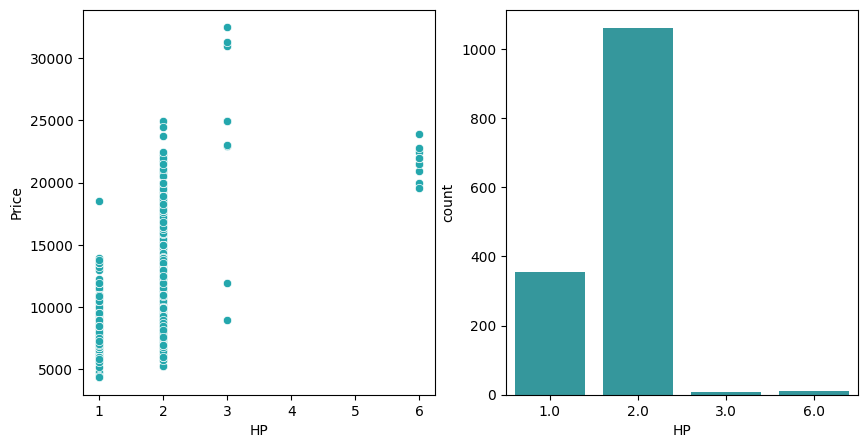

In [ ]:
df.loc[(df['HP']>=68.877) & (df['HP']<=89.5),'HP']=1
df.loc[(df['HP']> 89.5) & (df['HP'] <=110.0),'HP']=2
df.loc[(df['HP']> 110.0) & (df['HP']<=130.5),'HP']=3
df.loc[(df['HP']>= 171.5) & (df['HP']<=192.0),'HP']=6
df=df.drop('HPBand',axis=1)

fig=plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.2,hspace=0.15)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

ax0=sns.scatterplot(ax=ax0,data=df,x='HP',y='Price', color='#24a7ad')
ax1=sns.countplot(ax=ax1,data=df,x='HP', color='#24a7ad')

#### 5. MetColor

Now we visualise `MetColor` to choose our method of feature imputation.

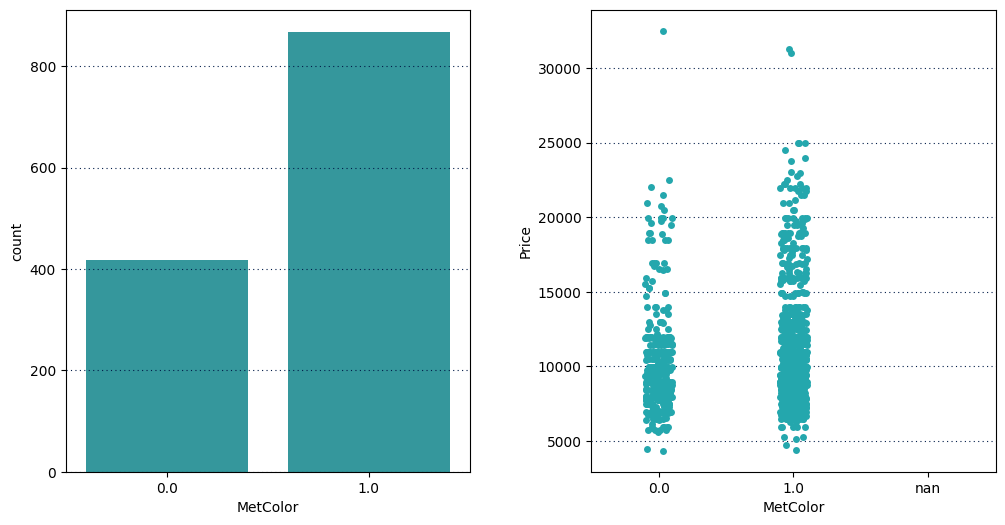

In [ ]:
fig=plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.3,hspace=0.15)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

ax0.grid(color='#001B48', linestyle=':', axis='y', zorder=0,  dashes=(1,3))
ax1.grid(color='#001B48', linestyle=':', axis='y', zorder=0, dashes=(1,3))

ax0=sns.countplot(ax=ax0,data=df,x='MetColor',color='#24a7ad')
ax1=sns.stripplot(ax=ax1,data=df,x='MetColor',y='Price',color='#24a7ad')

##### Observation:
* The mode of the distribution is 1 i.e Metallic Colour.
* Further it can be seen from the Strip-Plot that both categories have little difference between prices.
* Thus it's feasible to replace the null values with 1 owing to a very low difference in prices.

In [ ]:
df['MetColor'].fillna(df['MetColor'].mode()[0],inplace=True)
df.isnull().sum()

Price        0
Age          0
KM           0
FuelType     0
HP           0
MetColor     0
Automatic    0
CC           0
Doors        0
Weight       0
dtype: int64

#### 6. Doors

Although the feature `Doors` has no null value, it still contains multiple elements which have the number of doors in words. Therefore these words must be converted to numbers.

In [ ]:
df['Doors']=df['Doors'].replace('three','3')
df['Doors']=df['Doors'].replace('four','4')
df['Doors']=df['Doors'].replace('five','5')
print(df['Doors'].unique())

['3' '5' '4' '2']


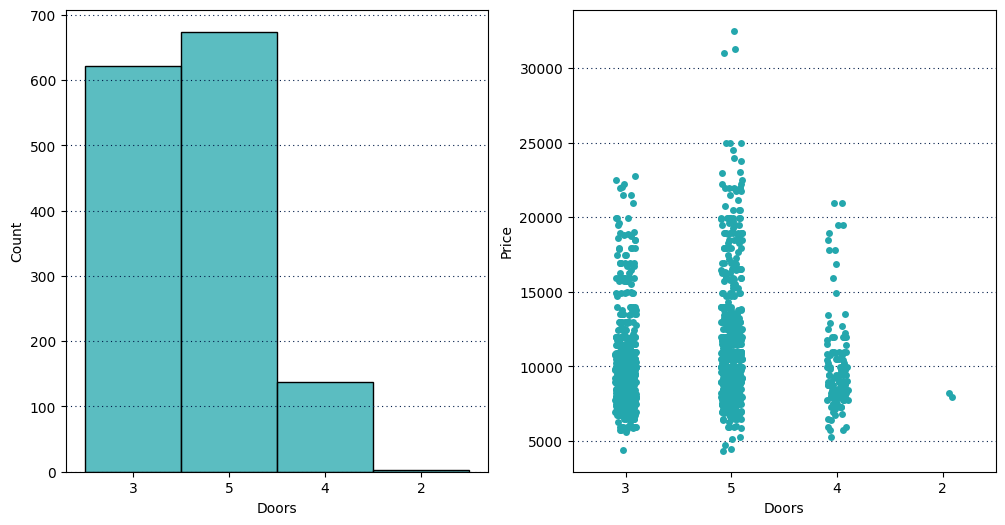

In [ ]:
fig=plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.2)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

ax0.grid(color='#001B48', linestyle=':', axis='y', zorder=0, dashes=(1,3))
ax1.grid(color='#001B48', linestyle=':', axis='y', zorder=0, dashes=(1,3))

ax0=sns.histplot(ax=ax0,data=df['Doors'], bins=6, color='#24a7ad')
ax1=sns.stripplot(ax=ax1,data=df,x='Doors',y='Price', color='#24a7ad')

#### 7. CC and Weight

Both these features don't contain any null values so we visualise them to see their distribution according to `Price`.

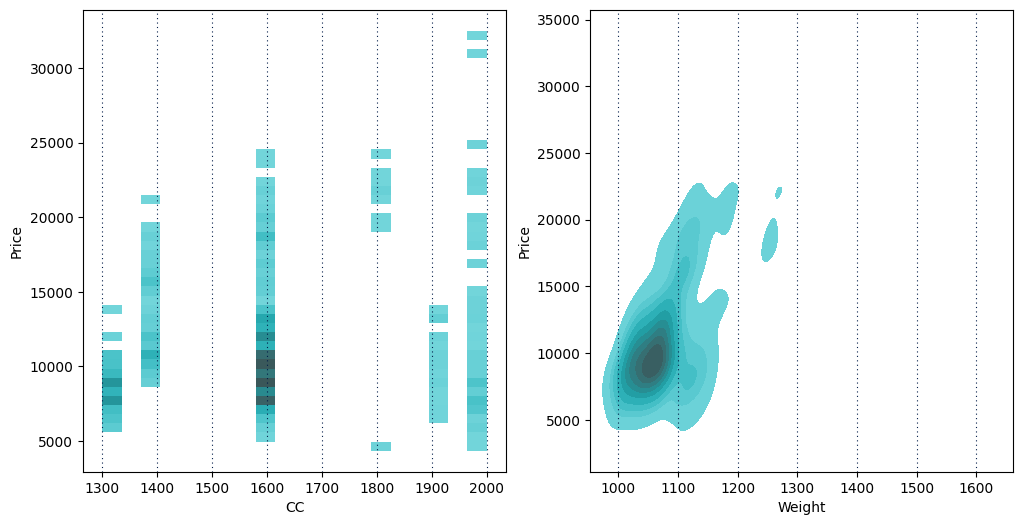

In [ ]:
fig=plt.figure(figsize=(12,6))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.2)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

ax0.grid(color='#001B48', linestyle=':', axis='x', zorder=0, dashes=(1,3))
ax1.grid(color='#001B48', linestyle=':', axis='x', zorder=0, dashes=(1,3))

ax0=sns.histplot(ax=ax0,data=df,x='CC',y='Price', color='#24a7ad')
ax1=sns.kdeplot(ax=ax1,data=df,x='Weight',y='Price',fill=True, color='#24a7ad')

##### Observation:
* The feature `CC` can be divided into 8 classes as there are a large number of elements which have the same `CC`.

In [ ]:
df['CCClass']=pd.cut(df['CC'],bins=8)
uniques=df['CCClass'].unique()
print("CC Class intervals:")
for i in uniques:
    print(i)

CC Class intervals:
(1912.5, 2000.0]
(1737.5, 1825.0]
(1825.0, 1912.5]
(1562.5, 1650.0]
(1387.5, 1475.0]
(1299.3, 1387.5]


* Now we create 8 different bands of CC using these boundary values.
* The bands 3 and 5 contain no elements and thus will be skipped.

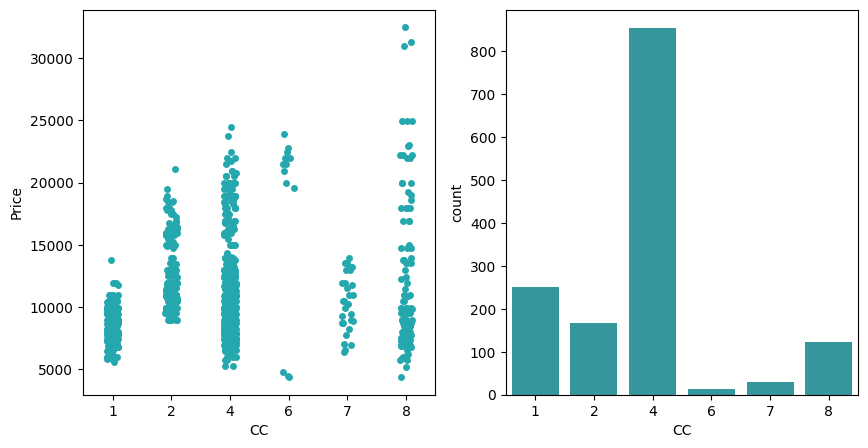

In [ ]:
df.loc[(df['CC']>1299.3) & (df['CC']<=1387.5),'CC']=1
df.loc[(df['CC']> 1387.5) & (df['CC'] <=1475.0),'CC']=2
df.loc[(df['CC']> 1562.5) & (df['CC']<=1650.0),'CC']=4
df.loc[(df['CC']> 1737.5) & (df['CC']<=1825.0),'CC']=6
df.loc[(df['CC']> 1825.0) & (df['CC']<=1912.5),'CC']=7
df.loc[(df['CC']> 1912.5) & (df['CC']<=2000.0),'CC']=8

df=df.drop('CCClass',axis=1)

fig=plt.figure(figsize=(10,5))
gs = fig.add_gridspec(1,2)
gs.update(wspace=0.2,hspace=0.15)

ax0=fig.add_subplot(gs[0,0])
ax1=fig.add_subplot(gs[0,1])

ax0=sns.stripplot(ax=ax0,data=df,x='CC',y='Price', color='#24a7ad')
ax1=sns.countplot(ax=ax1,data=df,x='CC', color='#24a7ad')

***

<a id='eda'></a>
## <div style='text-align: center;'> 3. EDA and Scaling </div>

### Multivariate Analysis

#### Correlation Matrix:

This helps us understand the general distribution of every feature with respect to others.

In [ ]:
df_corr = df.corr().transpose()
df_corr

<ipython-input-128-d55857977e9e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr().transpose()


,Price,Age,KM,HP,MetColor,Automatic,CC,Weight
Price,1.000000,-0.833044,-0.565016,0.448651,0.100920,0.033081,0.165182,0.581198
Age,-0.833044,1.000000,0.484474,-0.332022,-0.085652,0.026082,-0.116688,-0.446206
KM,-0.565016,0.484474,1.000000,-0.313134,-0.088175,-0.080743,0.296028,-0.025758
HP,0.448651,-0.332022,-0.313134,1.000000,0.058644,-0.031655,0.243463,0.304825
MetColor,0.100920,-0.085652,-0.088175,0.058644,1.000000,-0.011450,0.032294,0.046614
Automatic,0.033081,0.026082,-0.080743,-0.031655,-0.011450,1.000000,-0.068887,0.057249
CC,0.165182,-0.116688,0.296028,0.243463,0.032294,-0.068887,1.000000,0.651570
Weight,0.581198,-0.446206,-0.025758,0.304825,0.046614,0.057249,0.651570,1.000000


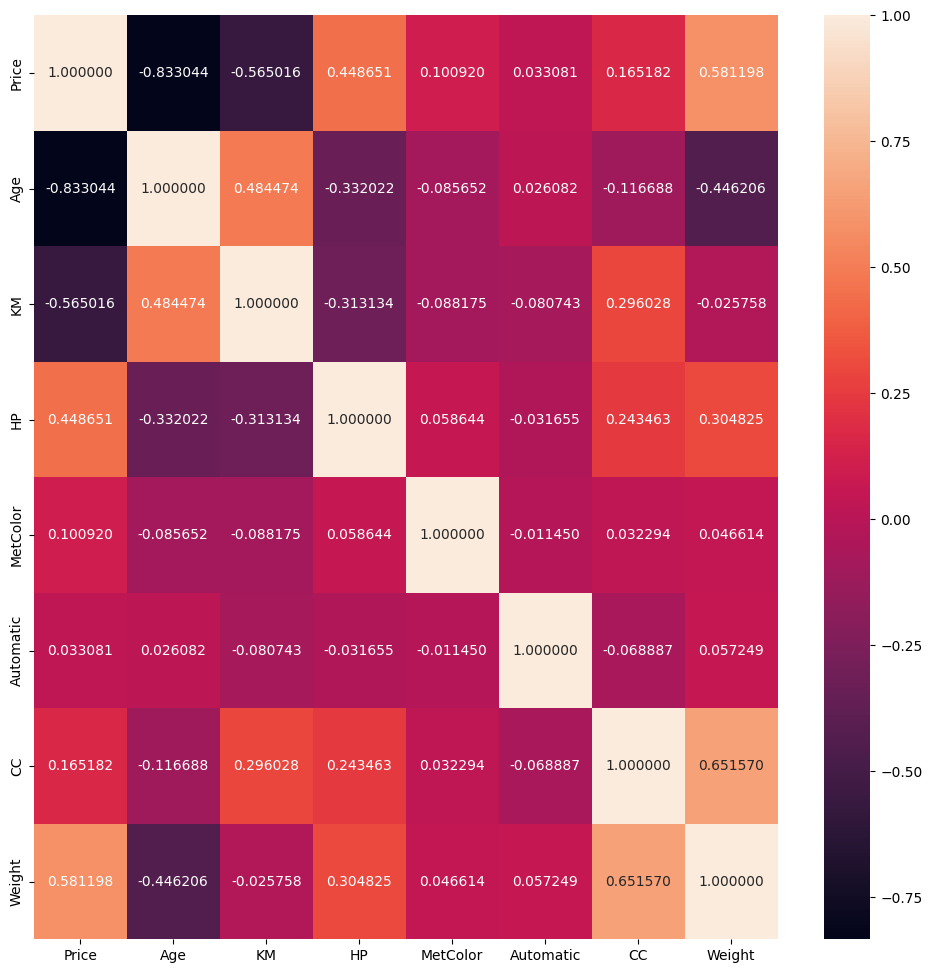

In [ ]:
fig = plt.figure(figsize=(12,12))
gs = fig.add_gridspec(1,1)

ax0 = fig.add_subplot(gs[0,0])
ax0=sns.heatmap(df_corr,fmt='0.6f',annot=True,ax=ax0)

##### Observations:
* `Price`- Cars which are heavy and have high horsepower cost more while an old and used cars tend to cost less.
* `KM` - Cars which are older tend to have been driven a larger distance.
* `CC`- Cars which have a large engine will have more weight as well as horsepower.


#### 1. Analysis of `Age` vs. `CC`vs. `HP`

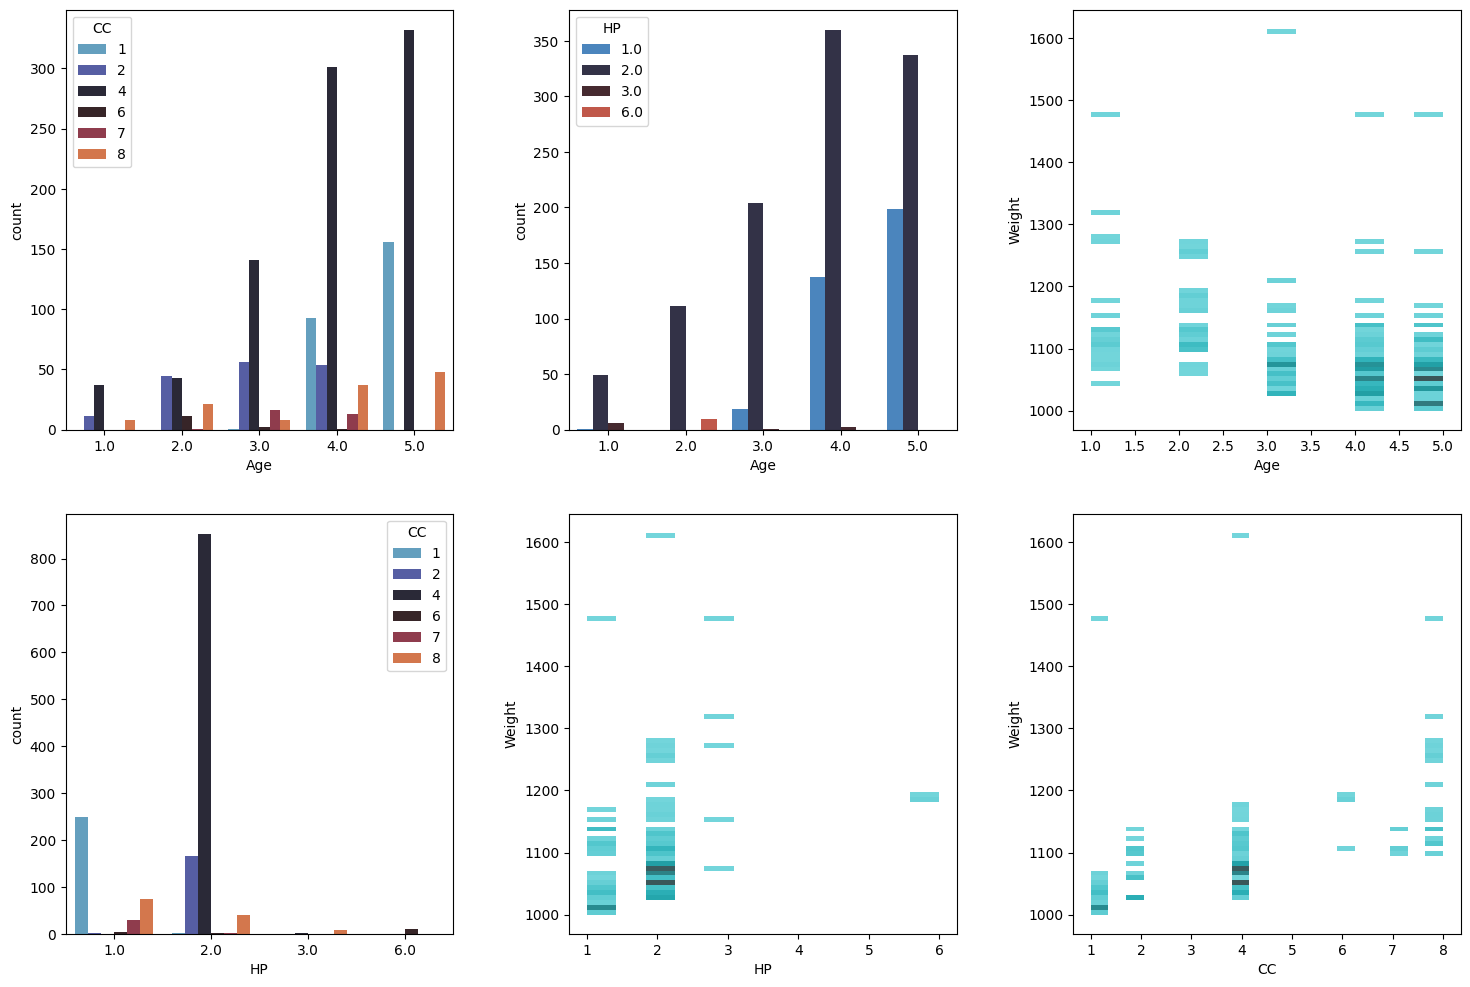

In [ ]:
fig = plt.figure(figsize=(18,12))
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.3)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

ax0=sns.countplot(data=df,ax=ax0,x='Age',hue='CC',palette='icefire')
ax1=sns.countplot(data=df,ax=ax1,x='Age',hue='HP',palette='icefire')
ax2=sns.histplot(data=df,ax=ax2,x='Age',y='Weight', color='#24a7ad')
ax3=sns.countplot(data=df,ax=ax3,x='HP',hue='CC',palette='icefire')
ax4=sns.histplot(data=df,ax=ax4,x='HP',y='Weight', color='#24a7ad')
ax5=sns.histplot(data=df,ax=ax5,x='CC',y='Weight', color='#24a7ad')

##### Observation:
* Older cars tend to have a higher `CC` and lower `HP`.
* Lighter cars have less `CC` as well as `HP`

### Feature Encoding and Scaling

#### Encoding FuelType:

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(df['FuelType'].unique())
df["FuelType"]=le.transform(df["FuelType"])
df.head()

,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,13500,2.0,46986.0,1,2.0,1.0,0,8,3,1165
1,13750,2.0,72937.0,1,2.0,1.0,0,8,3,1165
2,13950,2.0,41711.0,1,2.0,1.0,0,8,3,1165
3,14950,2.0,48000.0,1,2.0,0.0,0,8,3,1165
4,13750,2.0,38500.0,1,2.0,0.0,0,8,3,1170


#### Scaling the Input Features:

In [ ]:
X=df.drop('Price',axis=1)
y=df['Price']

scaler=preprocessing.StandardScaler()
val=X.values
val_scaled=scaler.fit_transform(val)
X=pd.DataFrame(val_scaled,columns=X.columns)
X.head(5)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,-1.754248,-0.583476,-2.462384,0.377991,0.640788,-0.242893,2.313381,-1.085139,1.758561
1,-1.754248,0.115551,-2.462384,0.377991,0.640788,-0.242893,2.313381,-1.085139,1.758561
2,-1.754248,-0.725566,-2.462384,0.377991,0.640788,-0.242893,2.313381,-1.085139,1.758561
3,-1.754248,-0.556163,-2.462384,0.377991,-1.560579,-0.242893,2.313381,-1.085139,1.758561
4,-1.754248,-0.812059,-2.462384,0.377991,-1.560579,-0.242893,2.313381,-1.085139,1.853577


***
<a id='ml'></a>
## <div style='text-align: center;'> 4. Machine Learning </div>

### Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 64)
X_train.sample(5)

,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
1034,0.970085,-1.129962,0.339505,0.377991,-1.560579,-0.242893,0.177037,-1.085139,-0.331788
52,-1.754248,-0.340671,0.339505,0.377991,0.640788,4.117038,0.177037,1.014941,2.043609
1120,0.970085,0.000000,0.339505,-1.390071,0.640788,-0.242893,-1.425221,-1.085139,-1.091915
977,0.061974,-0.610036,0.339505,-1.390071,-1.560579,-0.242893,-1.425221,1.014941,-0.711851
81,-1.754248,-1.310383,0.339505,0.377991,0.640788,-0.242893,0.177037,1.014941,0.808402


### Importing modules for building models and calculating their accuracy

In [ ]:
# Creating and Training Models
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

### Linear Regression:

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

print('Linear Regression Train Score is : ' , lr.score(X_train, y_train))
print('Linear Regression Test Score is : ' , lr.score(X_test, y_test))

Linear Regression Train Score is :  0.8071172478568515
Linear Regression Test Score is :  0.8807732275377751


### Ridge Regression:

In [ ]:
clf=Ridge(alpha=0.2)
clf.fit(X_train,y_train)

print('Ridge Regression Train Score is : ' , clf.score(X_train, y_train))
print('Ridge Regression Test Score is : ' , clf.score(X_test, y_test))

Ridge Regression Train Score is :  0.8071172332264772
Ridge Regression Test Score is :  0.8807617054963304


### Lasso Regression:

In [ ]:
ls=Lasso(alpha=0.0005)
ls.fit(X_train,y_train)

print('Lasso Regression Train Score is : ' , ls.score(X_train, y_train))
print('Lasso Regression Test Score is : ' , ls.score(X_test, y_test))

Lasso Regression Train Score is :  0.807117247856614
Lasso Regression Test Score is :  0.8807731966290154


### K-Nearest-Neighbours Regression:

In [ ]:
knn=KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train,y_train)

print("KNN Regression Train Score is : " , knn.score(X_train, y_train))
print("KNN Regression Test Score is : " , knn.score(X_test, y_test))

KNN Regression Train Score is :  0.8496778198951315
KNN Regression Test Score is :  0.8681705944230496


### Decision Tree Regression:

In [ ]:
dt=DecisionTreeRegressor(max_depth=8)
dt.fit(X_train,y_train)

print("Decision Tree Regression Train Score is : " , dt.score(X_train, y_train))
print("Decision Tree Regression Test Score is : " , dt.score(X_test, y_test))

Decision Tree Regression Train Score is :  0.9145415808042742
Decision Tree Regression Test Score is :  0.856884837016361


### Random Forest Regression:

In [ ]:
forest=RandomForestRegressor(criterion='absolute_error',max_depth=100,n_estimators=500,random_state=0,n_jobs=-1)
forest.fit(X_train,y_train)

print("Random Forest Regression Train Score is : " , forest.score(X_train, y_train))
print("Random Forest Regression Test Score is : " , forest.score(X_test, y_test))

Random Forest Regression Train Score is :  0.9716979335123466
Random Forest Regression Test Score is :  0.9003523527641488


### Gradient Boosting Regression:

In [ ]:
gbr=GradientBoostingRegressor(random_state=0,max_depth=8)
gbr.fit(X_train,y_train)

print("Gradient Boosting Regression Train Score is : " , gbr.score(X_train, y_train))
print("Gradient Boosting Regression Test Score is : " , gbr.score(X_test, y_test))

Gradient Boosting Regression Train Score is :  0.9898294085060244
Gradient Boosting Regression Test Score is :  0.8863559534230536


### Comparing Models

In [ ]:
lr_trainscore=lr.score(X_train,y_train)*100
clf_trainscore=clf.score(X_train,y_train)*100
ls_trainscore=ls.score(X_train,y_train)*100
dt_trainscore=dt.score(X_train,y_train)*100
fr_trainscore=forest.score(X_train,y_train)*100
knn_trainscore=knn.score(X_train,y_train)*100
gbr_trainscore=gbr.score(X_train, y_train)*100

lr_testscore=lr.score(X_test,y_test)*100
clf_testscore=clf.score(X_test,y_test)*100
ls_testscore=ls.score(X_test,y_test)*100
dt_testscore=dt.score(X_test,y_test)*100
fr_testscore=forest.score(X_test,y_test)*100
knn_testscore=knn.score(X_test,y_test)*100
gbr_testscore=gbr.score(X_test, y_test)*100


models = pd.DataFrame({
    'Regression Model' : ['Linear Regression',
                            'Ridge Regression',
                            'Lasso Regression',
                            'Decision Tree',
                            'Random Forest',
                            'KNN Regression',
                            'Gradient Boosting'],

    'Train Score' : [lr_trainscore,
                     clf_trainscore,
                     ls_trainscore,
                     dt_trainscore,
                     fr_trainscore,
                     knn_trainscore,
                     gbr_trainscore],

    'Test Score'  : [lr_testscore,
                     clf_testscore,
                     ls_testscore,
                     dt_testscore,
                     fr_testscore,
                     knn_testscore,
                     gbr_testscore]
})


models.sort_values(by = 'Test Score', ascending = False)

,Regression Model,Train Score,Test Score
4,Random Forest,97.169793,90.035235
6,Gradient Boosting,98.982941,88.635595
0,Linear Regression,80.711725,88.077323
2,Lasso Regression,80.711725,88.077320
1,Ridge Regression,80.711723,88.076171
5,KNN Regression,84.967782,86.817059
3,Decision Tree,91.454158,85.688484


#### Observation:
* Random Forest and Gradient Boosting Regression exhibit the highest Test as well as Training accuracy.
* Gradient Boosting Regression exhibits greatest overfitting.
* In this case, however even if Random Forest and Gradient Boosting Regression exhibit higher test scores they still show an impractical amount of overfitting.
* Therefore in this case we choose KNN and Decision Tree Regression as they exhibit a tolerable amount of overfitting.